In [1]:
# Dependencies
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [2]:
# read cleaned csv data
cleaned_movie_pd = pd.read_csv("clean_data_for_analysis.csv")
cleaned_movie_pd.head()

,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform
0,Insidious: The Last Key,Movie,2018-01-05,6180.0,Horror,NaN,49.0,5.7,63102,tt5726086,10000000.0,167885588.0,others
1,Stratton,Movie,2018-01-05,5700.0,Action,NaN,26.0,4.8,5405,tt3567666,NaN,257212.0,others
2,Sweet Country,Movie,2018-04-06,6780.0,Adventure,NaN,88.0,6.9,8855,tt6958212,NaN,1849718.0,others
3,The Commuter,Movie,2018-01-12,6240.0,Action,NaN,56.0,6.3,118954,tt1590193,30000000.0,119942387.0,others
4,Freak Show,Movie,2018-01-12,5460.0,Comedy,NaN,54.0,6.5,4376,tt5089534,NaN,20657.0,others


In [3]:
cleaned_movie_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1153 non-null   object 
 1   Type         1153 non-null   object 
 2   Release      1153 non-null   object 
 3   Runtime      1153 non-null   float64
 4   Genre        1153 non-null   object 
 5   Nominations  167 non-null    float64
 6   Metascore    1053 non-null   float64
 7   imdbRating   1153 non-null   float64
 8   imdbVotes    1153 non-null   int64  
 9   imdbID       1153 non-null   object 
 10  Budget       500 non-null    float64
 11  Gross        837 non-null    float64
 12  Platform     1153 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 117.2+ KB


In [62]:
# split data groups to streaming and non-streaming (netflix)
non_streaming_df = cleaned_movie_pd.loc[(cleaned_movie_pd["Platform"] == "others"), :]
streaming_df = cleaned_movie_pd.loc[(cleaned_movie_pd["Platform"] == "netflix"), :]

In [4]:
# convert Release date to datetime data type
# then get only the released year
cleaned_movie_pd["Release"] = pd.to_datetime(cleaned_movie_pd["Release"]).dt.year
cleaned_movie_pd.head()

,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform
0,Insidious: The Last Key,Movie,2018,6180.0,Horror,NaN,49.0,5.7,63102,tt5726086,10000000.0,167885588.0,others
1,Stratton,Movie,2018,5700.0,Action,NaN,26.0,4.8,5405,tt3567666,NaN,257212.0,others
2,Sweet Country,Movie,2018,6780.0,Adventure,NaN,88.0,6.9,8855,tt6958212,NaN,1849718.0,others
3,The Commuter,Movie,2018,6240.0,Action,NaN,56.0,6.3,118954,tt1590193,30000000.0,119942387.0,others
4,Freak Show,Movie,2018,5460.0,Comedy,NaN,54.0,6.5,4376,tt5089534,NaN,20657.0,others


In [5]:
# filter out pre- and post- and during-covid data
movies_pre_covid = cleaned_movie_pd.loc[(cleaned_movie_pd["Release"] == 2018) |
                                        (cleaned_movie_pd["Release"] == 2019), :]

movies_post_covid = cleaned_movie_pd.loc[(cleaned_movie_pd["Release"] == 2021) |
                                        (cleaned_movie_pd["Release"] == 2022), :]

movies_during_covid = cleaned_movie_pd.loc[(cleaned_movie_pd["Release"] == 2020), :]

In [28]:
# group by average imdbRatings for each release year for all film types
movies_rating_grp = pd.DataFrame(cleaned_movie_pd.groupby(["Release"])["imdbRating", "Metascore"].mean())
movies_rating_grp

C:\Users\Jing Surface\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,imdbRating,Metascore
Release,,
2018,6.355869,57.836634
2019,6.363492,56.530726
2020,6.061712,55.173913
2021,6.167730,57.345238
2022,6.031579,58.915493


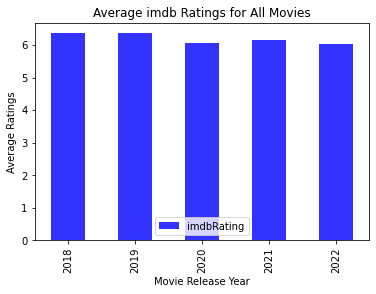

In [83]:
# plot the movie ratings against release year for all movies

move_rating_plot = movies_rating_grp.plot(kind = "bar", y = ["imdbRating"], color = "b", alpha = 0.8)


plt.xlabel("Movie Release Year")
plt.ylabel("Average Ratings")
plt.title("Average imdb Ratings for All Movies")
plt.show()

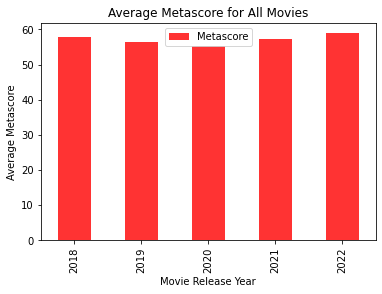

In [84]:
# plot the movie Metascore against release year for all movies

move_rating_plot = movies_rating_grp.plot(kind = "bar", y = ["Metascore"], color = "r", alpha = 0.8)


plt.xlabel("Movie Release Year")
plt.ylabel("Average Metascore")
plt.title("Average Metascore for All Movies")
plt.show()

In [60]:
# group by average gross for each release year
all_movies_gross_grp = pd.DataFrame(cleaned_movie_pd.groupby(["Release"])["Budget", "Gross"].mean())
all_movies_gross_grp

C:\Users\Jing Surface\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Budget,Gross
Release,,
2018,4.845898e+07,1.297669e+08
2019,5.009270e+07,1.322612e+08
2020,4.408144e+07,2.798931e+07
2021,8.517936e+07,5.874817e+07
2022,6.494768e+07,1.021143e+08


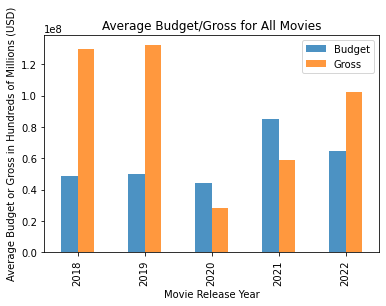

In [75]:
# plot the movie gross against release year for all film types
all_movies_gross_grp.plot(kind = "bar", alpha = 0.8)

plt.xlabel("Movie Release Year")
plt.ylabel("Average Budget or Gross in Hundreds of Millions (USD)")
plt.title("Average Budget/Gross for All Movies")
plt.show()

# tested - empty cells do not count towards average/sum calculations

In [76]:
# plot the movie gross against release year for non-streaming & streaming film types
nonstreaming_movies_gross_grp = pd.DataFrame(non_streaming_df.groupby(["Release"])["Budget", "Gross"].mean())
streaming_movies_gross_grp = pd.DataFrame(streaming_df.groupby(["Release"])["Budget", "Gross"].mean())

C:\Users\Jing Surface\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\Jing Surface\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


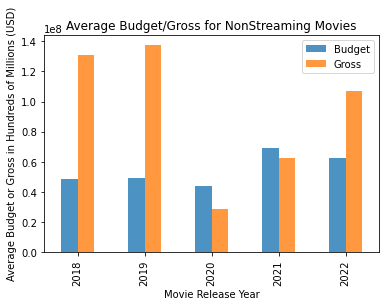

In [77]:
# plot the movie gross against release year for non-streaming & streaming film types

nonstreaming_movies_gross_grp.plot(kind = "bar", alpha = 0.8)

plt.xlabel("Movie Release Year")
plt.ylabel("Average Budget or Gross in Hundreds of Millions (USD)")
plt.title("Average Budget/Gross for NonStreaming Movies")
plt.show()


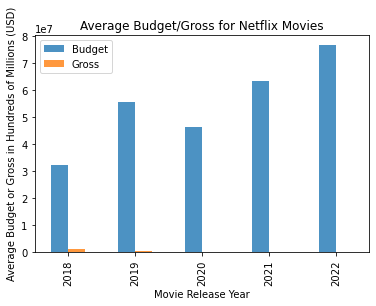

In [79]:
# plot the movie gross against release year for streaming film types

streaming_movies_gross_grp.plot(kind = "bar", alpha = 0.8)

plt.xlabel("Movie Release Year")
plt.ylabel("Average Budget or Gross in Hundreds of Millions (USD)")
plt.title("Average Budget/Gross for Netflix Movies")
plt.show()

In [118]:
# Average Gross per genre
genre_df = pd.DataFrame(cleaned_movie_pd.groupby(["Release", "Genre"])["Gross"].mean().fillna(0))
genre_df

Gross
Release Genre                  
2018    Action     2.464242e+08
        Adventure  1.422069e+08
        Animation  3.349816e+08
        Biography  7.165665e+07
        Comedy     4.371985e+07
...                         ...
2022    Family     1.115158e+06
        Fantasy    4.588389e+06
        Horror     7.745254e+07
        Mystery    2.664660e+05
        Thriller   3.054116e+06

[61 rows x 1 columns]

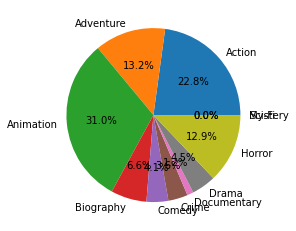

In [119]:
# gross per genre type for 2018
genre_df_2018 = genre_df.loc[2018].reset_index(drop = False)

plt.pie(genre_df_2018["Gross"], labels = genre_df_2018["Genre"], autopct="%1.1f%%")
plt.show()

ValueError: 'label' must be of length 'x'

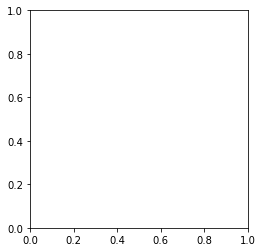

In [120]:
# gross per genre type for 2019
genre_df_2019 = genre_df.loc[2019].reset_index(drop = False)

plt.pie(genre_df_2019["Gross"], labels = genre_df_2018["Genre"], autopct="%1.1f%%")
plt.show()